In [14]:
import warnings
warnings.filterwarnings('ignore')

# Scivision .py - basic usage

## 1) Import scivision (and matplotlib to view images)

In [15]:
import matplotlib.pyplot as plt
from scivision import default_catalog, load_pretrained_model, load_dataset

## 2) View the datasources in scivision catalog

In [16]:
data = default_catalog.datasources.to_dataframe()
data

,name,description,tasks,labels_provided,domains,url,format,institution,tags
0,stardist-cell-nuclei-2D,Cell microscopy test dataset for detection and...,"(TaskEnum.segmentation, TaskEnum.object_detect...",True,"(optical-microscopy,)",https://github.com/stardist/stardist/releases/...,image,"(epfl,)","(help-needed, 3D, cell, cell-counting, biology..."
1,oppd-seedlings,The Open Plant Phenotyping Database [OPPD] is ...,"(TaskEnum.thresholding, TaskEnum.segmentation,...",True,"(multispectral, hyperspectral)",https://github.com/alan-turing-institute/oppd-...,image,"(Aarhus University,)","(help-needed, 2D, plant-phenotyping, agricultu..."
2,scivision-test-data,Test data comprised of individual images inclu...,"(TaskEnum.segmentation, TaskEnum.object_detect...",True,"(computer-vision,)",https://github.com/alan-turing-institute/scivi...,image,"(Wikipedia by Erik Veland,)","(demo,)"
3,cefas-plankton,Sample dataset of Plankton required to demonst...,(TaskEnum.classificiation),True,"(computer-vision,)",https://raw.githubusercontent.com/alan-turing-...,image,"(Centre for Environment, Fisheries and Aquacul...","(2D, plankton, ecology, environmental-science)"
4,coastal-edges,Sample dataset of satellite RGB imagery over t...,"(TaskEnum.segmentation, TaskEnum.classificiation)",False,"(computer-vision, earth-observation, ecology)",https://github.com/MartinSJRogers/VEdge_Detect...,image,"(Cambridge University,)","(2D, satellite, remote-sensing, ecology, envir..."
5,treecrowns,Sample dataset of drone RGB imagery over Sepil...,"(TaskEnum.segmentation, TaskEnum.object_detect...",False,"(computer-vision, earth-observation, ecology)",https://github.com/shmh40/detectreeRGB-treecro...,image,"(Cambridge University,)","(2D, drone, satellite, aerial, remote-sensing,..."
6,sentinel2_stac,Data plugin for accessing Sentinel-2 Cloud-Opt...,"(TaskEnum.segmentation, TaskEnum.classificiation)",False,"(computer-vision, earth-observation, ecology)",https://github.com/alan-turing-institute/scivi...,image,"(The Alan Turing Institute,)","(satellite, aerial, remote-sensing, ecology, e..."
7,flowers,"The 102 flowers dataset, created by Visual Geo...",(TaskEnum.classificiation),True,"(computer-vision, ecology)",https://github.com/nbarlowATI/flowers_data_repo,image,"(The Alan Turing Institute,)","(ecology, environmental-science)"
8,butterflies,The Butterfly Image Classification Kaggle chal...,(TaskEnum.classificiation),True,"(computer-vision, ecology)",https://github.com/nbarlowATI/butterfly_data_repo,image,"(The Alan Turing Institute,)","(butterflies, insects, animals, ecology)"
9,Parakeet,Synthetic cryoEM data from Parakeet,"(TaskEnum.classificiation, TaskEnum.thresholdi...",False,None,https://github.com/rosalindfranklininstitute/s...,image,"(Rosalind Franklin Institute,)","(CryoEM,)"


## 3) Find models compatible with "flowers"

In [17]:
compatible_models = default_catalog.compatible_models("flowers").to_dataframe()
compatible_models

,name,description,tasks,url,pkg_url,format,pretrained,labels_required,institution,tags
3,mapreader-plant,automated detection of plant patches in images...,"(TaskEnum.classificiation, TaskEnum.object_det...",https://github.com/alan-turing-institute/mapre...,git+https://github.com/alan-turing-institute/m...,image,True,False,"(alan-turing-institute,)","(2D, plant, phenotype, rgb, biology, agriculture)"
4,resnet50-plankton,automated classification of plankton images co...,"(TaskEnum.classificiation,)",https://github.com/alan-turing-institute/plank...,git+https://github.com/alan-turing-institute/p...,image,True,False,"(alan-turing-institute, cefas, plankton-analyt...","(2D, plankton, ecology, environmental-science)"
6,image-classifiers,Scivision plugin for the image-classifiers pac...,"(TaskEnum.classificiation,)",https://github.com/alan-turing-institute/scivi...,git+https://github.com/alan-turing-institute/s...,image,True,False,"(alan-turing-institute,)","(classification, 2D, image)"
7,huggingface-classifiers,Selection of image classifiers taken from http...,"(TaskEnum.classificiation,)",https://github.com/alan-turing-institute/scivi...,git+https://github.com/alan-turing-institute/s...,image,True,False,"(alan-turing-institute, huggingface)","(classification, 2D, image)"
11,flower-classification-model,Identify flower species,"(TaskEnum.classificiation,)",https://github.com/alan-turing-institute/flowe...,git+https://github.com/alan-turing-institute/f...,image,True,True,"(alan-turing-institute,)","(flowers, ecology)"
12,butterfly-classification-model,Identify butterfly species,"(TaskEnum.classificiation,)",https://github.com/alan-turing-institute/butte...,git+https://github.com/alan-turing-institute/b...,image,True,True,"(alan-turing-institute,)","(butterflies, insects, animals, ecology)"


## 4) Load "flowers" data

In [19]:
flowers_data_url = data[data.name == "flowers"].url.item()

In [20]:
flowers_data = load_dataset(flowers_data_url)

In [21]:
list(flowers_data)

['flowers']

In [22]:
flower_images = flowers_data.flowers().to_dask()

## 5) Load "flower-classification-model"

In [23]:
compatible_models[compatible_models.name == "flower-classification-model"].url.item()

FlexibleUrl('https://github.com/alan-turing-institute/flower_classification_model', scheme='https', host='github.com', tld='com', host_type='domain', path='/alan-turing-institute/flower_classification_model')

In [24]:
flower_classification_model_url = compatible_models[compatible_models.name == "flower-classification-model"].url.item()

In [25]:
flower_classification_model = load_pretrained_model(flower_classification_model_url, allow_install=True)

## 6) Use "flower-classification-model" to predict the species of flowers in "flowers" datasource

1/1 [==============================] - 1s 1s/step


'passion flower: 98.89%'

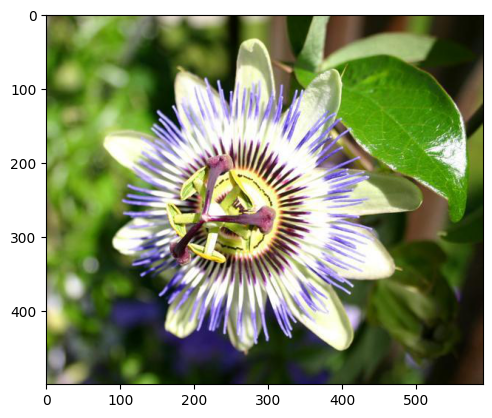

In [26]:
plt.imshow(flower_images[0])
flower_classification_model.predict(flower_images[0])

1/1 [==============================] - 2s 2s/step


"colt's foot: 98.35%"

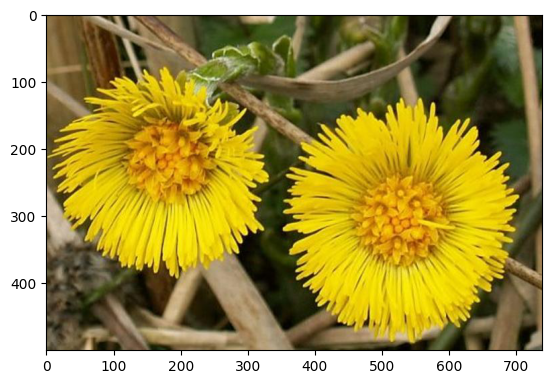

In [27]:
plt.imshow(flower_images[4000])
flower_classification_model.predict(flower_images[4000])